## Gene Inference

#### Libraries

In [1]:
import pickle
from algorithms.DIAMOnD import DIAMOnD
import networkx as nx
import matplotlib.pyplot as plt

#### Variables

In [2]:
# Name of the files to Load
Graph_of_PPI_LCC_file_name = "results/PPIGraph/Graph_of_PPI_LCC"
Seed_Genes_in_the_Interactome_file_name = "results/GDA/Seed_Genes_in_the_Interactome"
Graph_of_Disease_Interactome_file_name = "results/GDA/Graph_of_Disease_Interactome"

# Name of the files to Save
nodes_inferred_by_DIAMOnD_file = 'results/GeneInference/Node Inferred by DIAMOnD'
Graph_of_Seeds_and_Putative_from_DIAMOnD_File_Name = "results/GeneInference/Graph_of_Seeds_and_Putative_from_DIAMOnD"
Disease_Interactome_After_Inference_Image_File_Name = "results/GeneInference/Disease_Interactome_After_Inference_Image.png"
Disease_Interactome_Image_File_Name = "results/GeneInference/Disease_Interactome_Image"



node_to_infer = 100

#### Loading of the files

In [3]:
with open(Graph_of_PPI_LCC_file_name, "rb") as file:
    Graph_of_PPI_LCC = pickle.load(file)
with open(Seed_Genes_in_the_Interactome_file_name, "rb") as file:
    Seed_genes_Symbols = pickle.load(file)
# # For Funct_DIAMOnD
# with open('Set_of_Seed_Enriched_Onthologies', 'rb') as file:
#     Set_of_Seed_Enriched_Onthologies = pickle.load(file)
with open(Graph_of_Disease_Interactome_file_name, "rb") as file:
    Graph_of_Disease_Interactome = pickle.load(file)
    
   

 #### Function that we use

In [4]:
def Disease_Interactome_with_inference(Graph_of_PPI_LCC, Seeds, Putative,
                                       Graph_Image_Name):
    Seeds = list(Seeds)
    Putative = list(Putative)
    Seeds_and_Putative = Seeds + Putative
    Graph_of_Seeds_and_Putative = Graph_of_PPI_LCC.subgraph(Seeds_and_Putative)

    print("Features of the intial Disease Interactome:\n"
          + str(Graph_of_Disease_Interactome) + "\n")
    print("Features of the new Disease Interactome:\n"
          + str(Graph_of_Seeds_and_Putative) + "\n")
    exlusive_edges = \
        set(Graph_of_Seeds_and_Putative.edges()) - set(Graph_of_Disease_Interactome.edges())

    Connected_Components_of_Inferred_disease_Interactome = \
        nx.connected_components(Graph_of_Seeds_and_Putative)
    largest_cc = max(Connected_Components_of_Inferred_disease_Interactome, key=len)
    Graph_of_LCC_of_Inferred_disease_Interactome = \
        nx.subgraph(Graph_of_Seeds_and_Putative, largest_cc).copy()
    print("Features of the new Disease Interactome Largest Component: \n"
          + str(Graph_of_LCC_of_Inferred_disease_Interactome) + "\n")

    # pos = nx.kamada_kawai_layout(Graph_of_Seeds_and_Putative)
    pos = nx.spring_layout(Graph_of_Seeds_and_Putative, k=0.7,
                           seed=58)
    plt.figure(figsize=(12, 9))
    seed_node_color = 'red'
    putative_node_color = 'blue'
    initial_edge_node_color = 'orange'
    inference_exclusive_edge_node_color = 'Green'
    nx.draw_networkx_nodes(Graph_of_Seeds_and_Putative, pos,
                           nodelist=Seeds,
                           node_size=8, node_color=seed_node_color,
                           edgecolors='red', label='seed disease genes')
    nx.draw_networkx_nodes(Graph_of_Seeds_and_Putative, pos,
                           nodelist=Putative,
                           node_size=8, node_color=putative_node_color,
                           edgecolors='blue', label='putative disease genes')
    nx.draw_networkx_edges(Graph_of_Seeds_and_Putative, pos,
                           width=0.3, alpha=1,
                           edge_color=initial_edge_node_color,
                           label='initial edges')
    nx.draw_networkx_edges(Graph_of_Seeds_and_Putative, pos,
                           width=0.2, alpha=1, edgelist=exlusive_edges,
                           edge_color=inference_exclusive_edge_node_color,
                           label='inference exclusive edges')
    plt.legend(prop={'size': 15})
    plt.savefig(Graph_Image_Name, dpi=700, bbox_inches='tight')
    plt.show()
    return Graph_of_Seeds_and_Putative

#### Graph of Disease Interactome after DIAMOnD inference


Features of the intial Disease Interactome:
Graph with 252 nodes and 847 edges

Features of the new Disease Interactome:
Graph with 352 nodes and 3841 edges

Features of the new Disease Interactome Largest Component: 
Graph with 316 nodes and 3841 edges



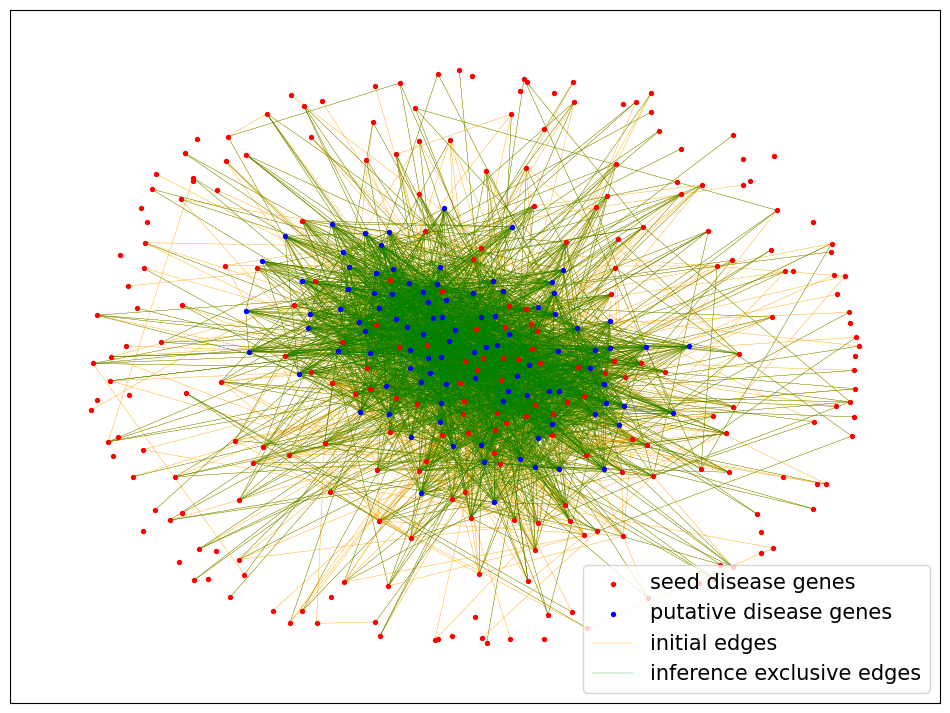

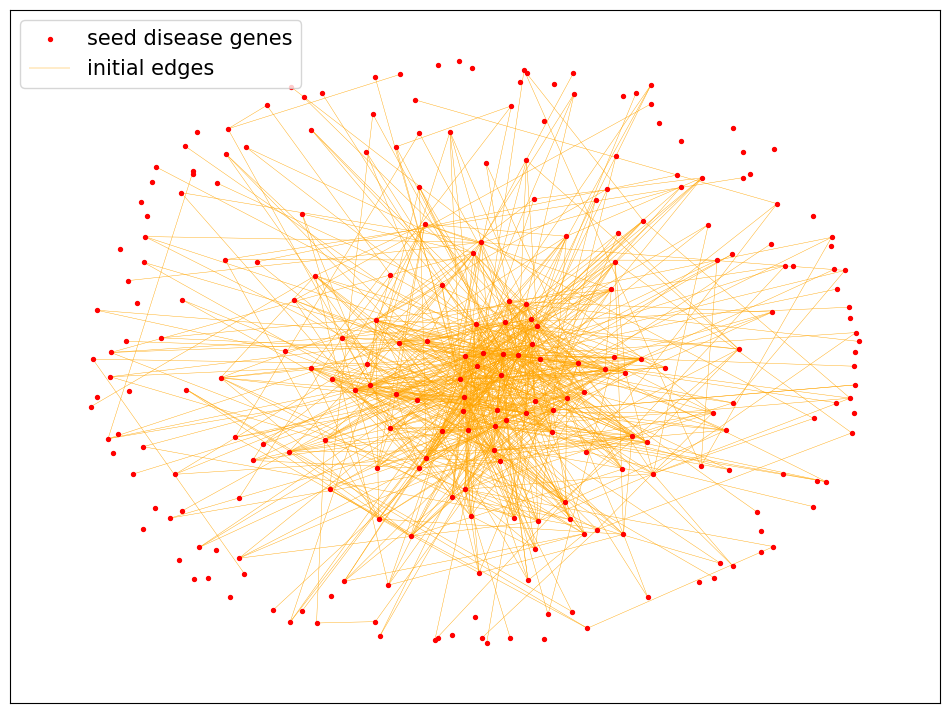

In [5]:
Tuples_of_nodes_added_by_DIAMOnD = DIAMOnD(Graph_of_PPI_LCC, Seed_genes_Symbols,
                                           node_to_infer, alpha=1,
                                           outfile=nodes_inferred_by_DIAMOnD_file)
nodes_added_by_DIAMOnD = [Generic_tuple[0]
                          for Generic_tuple in Tuples_of_nodes_added_by_DIAMOnD]

Graph_of_Seeds_and_Putative_from_DIAMOnD = \
    Disease_Interactome_with_inference(Graph_of_PPI_LCC, Seed_genes_Symbols, nodes_added_by_DIAMOnD,
                                       Disease_Interactome_After_Inference_Image_File_Name)

with open(Graph_of_Seeds_and_Putative_from_DIAMOnD_File_Name, "wb") as file:
    pickle.dump(Graph_of_Seeds_and_Putative_from_DIAMOnD, file)

# Graph of the Initial Interactome
plt.figure(figsize=(12, 9))
pos = nx.spring_layout(Graph_of_Seeds_and_Putative_from_DIAMOnD, k=0.7,
                       seed=58)
seed_node_color = 'red'
initial_edge_node_color = 'orange'
nx.draw_networkx_nodes(Graph_of_Seeds_and_Putative_from_DIAMOnD, pos,
                       nodelist=list(Graph_of_Disease_Interactome.nodes),
                       node_size=8, node_color=seed_node_color,
                       edgecolors='red', label='seed disease genes')
nx.draw_networkx_edges(Graph_of_Seeds_and_Putative_from_DIAMOnD, pos,
                       width=0.3, alpha=1,
                       edgelist=list(Graph_of_Disease_Interactome.edges),
                       edge_color=initial_edge_node_color,
                       label='initial edges')
plt.legend(prop={'size': 15}, loc='upper left')
plt.savefig(Disease_Interactome_Image_File_Name, dpi=700, bbox_inches='tight')

